In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, models,datasets

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vgg = models.vgg19(pretrained = True).features
vgg

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
for param in vgg.parameters():
    param.requires_grad_(False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
device

device(type='cuda')

In [ ]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
path = "/content/drive/MyDrive/PyTorch_Vol2/Images"
!ls "/content/drive/MyDrive/PyTorch_Vol2/Images"

City.jpg  MonaLisa.jpg	StarryNight.jpg


In [ ]:
all_images = {}
for i in os.listdir(path):

    name = os.path.normpath(i)
    name = name.replace(".jpg","")

    all_images[name] = path + "/" + i

all_images

{'City': '/content/drive/MyDrive/PyTorch_Vol2/Images/City.jpg',
 'MonaLisa': '/content/drive/MyDrive/PyTorch_Vol2/Images/MonaLisa.jpg',
 'StarryNight': '/content/drive/MyDrive/PyTorch_Vol2/Images/StarryNight.jpg'}

In [ ]:
image = Image.open(all_images["City"]).convert("RGB")
image.size

(4096, 2730)

In [ ]:
def load_image(img_path, max_size = 400, shape = None):

    image = Image.open(img_path).convert("RGB")
    
    if max(image.size) > max_size:
        size = max_size

    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_trans = transforms.Compose([
                                    transforms.Resize(size),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean = [0.5,0.5,0.5],
                                                        std = [0.5,0.5,0.5]) ])
    
    image = in_trans(image).unsqueeze(0)

    return image

In [ ]:
content = load_image(all_images["City"]).to(device)
style = load_image(all_images["StarryNight"] , shape = content.shape[-2:]).to(device)

In [ ]:
content.shape,content.shape[-2:]

(torch.Size([1, 3, 400, 600]), torch.Size([400, 600]))

In [ ]:
def img_convert(tensor):

    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1,2,0)
    image = image * np.array([0.5,0.5,0.5]) + np.array([0.5,0.5,0.5])
    image = image.clip(0,1)
    return image

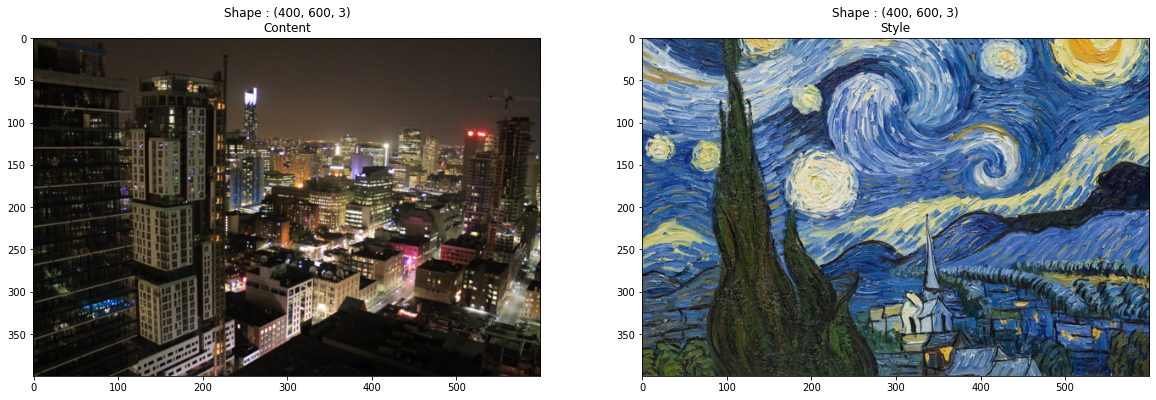

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))

ax1.imshow(img_convert(content[0]))
ax1.set_title(f"Shape : {img_convert(content[0]).shape}\nContent")

ax2.imshow(img_convert(style[0]))
ax2.set_title(f"Shape : {img_convert(style[0]).shape}\nStyle")

plt.show()

In [ ]:
len(vgg)

37

In [ ]:
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
i = 0
for name ,layer in vgg._modules.items():
    print(name,"----", layer)
    i+=1
    if i == 3:
        break

0 ---- Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1 ---- ReLU(inplace=True)
2 ---- Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
vgg[0](content).shape

torch.Size([1, 64, 400, 600])

In [ ]:
# https://proceedings.neurips.cc/paper/2015/file/a5e00132373a7031000fd987a3c9f87b-Paper.pdf

In [ ]:
def get_features(image , model):

    layers = {"0" : "conv1_1",
              "5" : "conv2_1",
              "10" : "conv3_1",
              "19" : "conv4_1",
              "21" : "conv4_2",  # Content Extraction
              "28" : "conv5_1"}

    features = {}

    for name ,layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image

    return features

In [ ]:
content_features = get_features(content,vgg)
style_features = get_features(style,vgg)
type(content_features),type(style_features)

(dict, dict)

In [ ]:
content_features.keys(),style_features.keys()

(dict_keys(['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv4_2', 'conv5_1']),
 dict_keys(['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv4_2', 'conv5_1']))

In [ ]:
for i in content_features.keys():
    print(i, "<---->", content_features[i].shape)

conv1_1 <----> torch.Size([1, 64, 400, 600])
conv2_1 <----> torch.Size([1, 128, 200, 300])
conv3_1 <----> torch.Size([1, 256, 100, 150])
conv4_1 <----> torch.Size([1, 512, 50, 75])
conv4_2 <----> torch.Size([1, 512, 50, 75])
conv5_1 <----> torch.Size([1, 512, 25, 37])


In [ ]:
for i in style_features.keys():
    print(i, "<---->", content_features[i].size(),"<---->", content_features[i].shape)

conv1_1 <----> torch.Size([1, 64, 400, 600]) <----> torch.Size([1, 64, 400, 600])
conv2_1 <----> torch.Size([1, 128, 200, 300]) <----> torch.Size([1, 128, 200, 300])
conv3_1 <----> torch.Size([1, 256, 100, 150]) <----> torch.Size([1, 256, 100, 150])
conv4_1 <----> torch.Size([1, 512, 50, 75]) <----> torch.Size([1, 512, 50, 75])
conv4_2 <----> torch.Size([1, 512, 50, 75]) <----> torch.Size([1, 512, 50, 75])
conv5_1 <----> torch.Size([1, 512, 25, 37]) <----> torch.Size([1, 512, 25, 37])


In [ ]:
content_features["conv1_1"].view(64,400*600).shape,content_features["conv1_1"].view(64,400*600).t().shape

(torch.Size([64, 240000]), torch.Size([240000, 64]))

In [ ]:
torch.mm(content_features["conv1_1"].view(64,400*600),content_features["conv1_1"].view(64,400*600).t()).shape

torch.Size([64, 64])

In [ ]:
def gram_matrix(tensor):

    _ , d, h, w = tensor.size()
    tensor = tensor.view(d, h*w)
    gram = torch.mm(tensor, tensor.t())
    return gram

In [ ]:
for layer in style_features:
    print(layer)

conv1_1
conv2_1
conv3_1
conv4_1
conv4_2
conv5_1


In [ ]:
style_grams = {layer : gram_matrix(style_features[layer]) for layer in style_features} 

In [ ]:
for i in style_grams.keys():
    print(i, "<---->", style_grams[i].shape)

conv1_1 <----> torch.Size([64, 64])
conv2_1 <----> torch.Size([128, 128])
conv3_1 <----> torch.Size([256, 256])
conv4_1 <----> torch.Size([512, 512])
conv4_2 <----> torch.Size([512, 512])
conv5_1 <----> torch.Size([512, 512])


In [ ]:
style_weights = {"conv1_1" : 1.,
                 "conv2_1" : 0.75,
                 "conv3_1" : 0.2,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.2} 

content_weight = 1
style_weight = 1e6

In [ ]:
target = content.clone().requires_grad_(True).to(device)

In [ ]:
target.shape

torch.Size([1, 3, 400, 600])

In [ ]:
show_every = 300
optimizer = torch.optim.Adam([target], lr = 0.003)
steps = 2100

height , width ,channels = img_convert(target[0]).shape
image_array = np.empty(shape = (300, height, width, channels))

capture_frame = steps / 300
counter = 0

In [ ]:
image_array.shape

(300, 400, 600, 3)

In [ ]:
target.requires_grad,content.requires_grad

(True, False)

Total Loss :  2887737.5
Iteration :  300



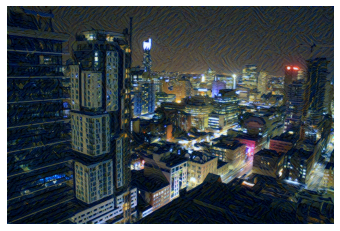

Total Loss :  950091.8125
Iteration :  600



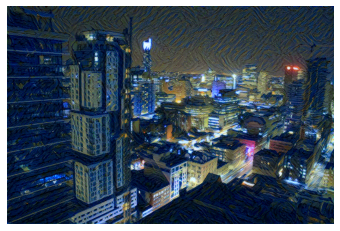

Total Loss :  658654.1875
Iteration :  900



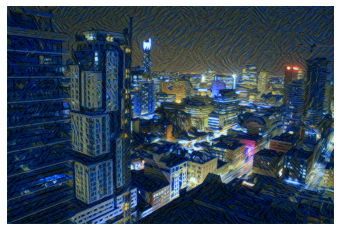

Total Loss :  510687.4375
Iteration :  1200



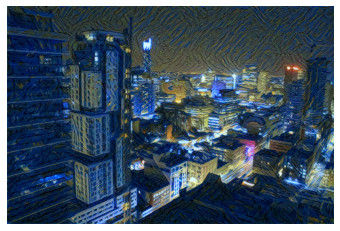

Total Loss :  400962.40625
Iteration :  1500



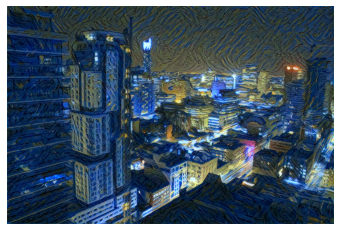

Total Loss :  315073.1875
Iteration :  1800



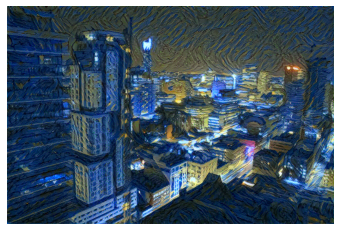

Total Loss :  246983.6875
Iteration :  2100



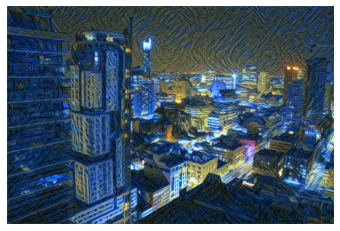

In [ ]:
for ii in range(1, steps + 1):

    target_features = get_features(target, vgg)

    content_loss = torch.mean((target_features["conv4_2"] - content_features["conv4_2"])**2)

    style_loss = 0

    for layer in style_weights:

        target_feature = target_features[layer]

        target_gram = gram_matrix(target_feature)

        style_gram = style_grams[layer]

        layer_style_loss = style_weights[layer] * torch.mean((target_gram  - style_gram) **2 )

        _, d, h, w = target_feature.shape
        
        style_loss +=layer_style_loss / (d* h* w)

    total_loss = content_weight * content_loss + style_weight * style_loss

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if ii % show_every == 0:

        print("Total Loss : ",total_loss.item())
        print("Iteration : ", ii)
        print()
        plt.imshow(img_convert(target[0]))
        plt.axis("off")
        plt.show()
    
    if ii % capture_frame == 0:
        image_array[counter] = img_convert(target[0])
        counter = counter + 1


In [ ]:
image_array.shape

(300, 400, 600, 3)

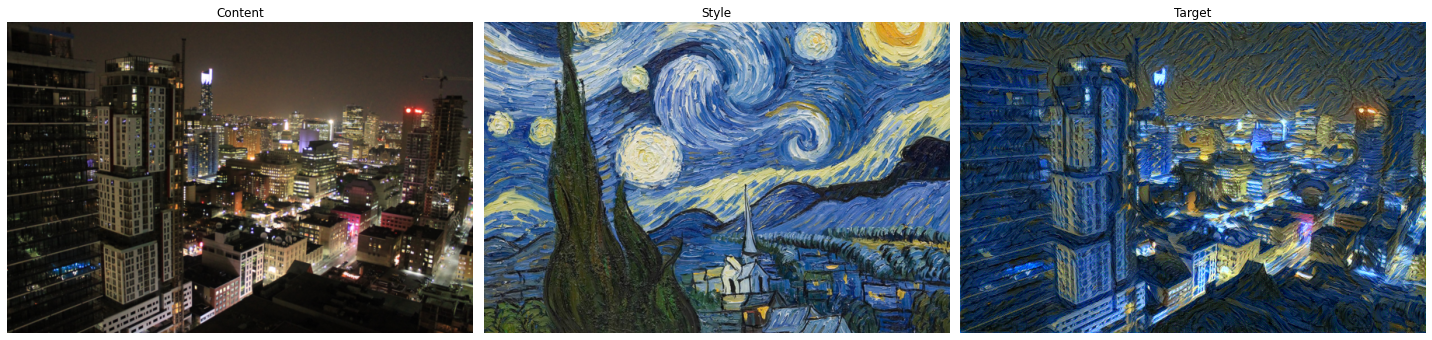

In [ ]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.imshow(img_convert(content[0]))
ax1.set_title("Content")
ax1.axis("off")

ax2.imshow(img_convert(style[0]))
ax2.set_title("Style")
ax2.axis("off")

ax3.imshow(img_convert(target[0]))
ax3.set_title("Target")
ax3.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import cv2
fps = 30
frame_height, frame_width, _ = img_convert(target[0]).shape

vid = cv2.VideoWriter("output.mp4",cv2.VideoWriter_fourcc(*"XVID"), fps, (frame_width, frame_height))


for i in range(0, 300):
    
    img = image_array[i]
    img = img * 255
    img = np.array(img, dtype = np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    vid.write(img)

vid.release()

In [ ]:
!ls

drive  output.mp4  sample_data


In [ ]:
from google.colab import files
files.download("output.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----

# Summary

In [58]:
import torch
import torch.nn as nn
from torchvision import transforms, models, datasets
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [59]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
vgg = models.vgg19(pretrained = True).features

for param in vgg.parameters():
    param.requires_grad_(False)
    #print(param.requires_grad)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [97]:
def load_image(img_path , max_size = 400, shape = None):

    image = Image.open(img_path).convert("RGB")
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    if shape is not None:
        size = shape
    in_transform = transforms.Compose([ transforms.Resize(size),transforms.ToTensor(), transforms.Normalize(mean = [0.5,0.5,0.5],std = [0.5,0.5,0.5])])
    image = in_transform(image).unsqueeze(0)
    return image

In [98]:
path =  "/content/drive/MyDrive/PyTorch_Vol2/Images"
image_all = {}
for i in os.listdir(path):
    name = os.path.basename(i)
    name = name.replace(".jpg","").replace(".JPG","")

    image_all[name] = path + '/' + i

image_all

{'City': '/content/drive/MyDrive/PyTorch_Vol2/Images/City.jpg',
 'MonaLisa': '/content/drive/MyDrive/PyTorch_Vol2/Images/MonaLisa.jpg',
 'StarryNight': '/content/drive/MyDrive/PyTorch_Vol2/Images/StarryNight.jpg',
 'batu': '/content/drive/MyDrive/PyTorch_Vol2/Images/batu.jpg',
 'pinar': '/content/drive/MyDrive/PyTorch_Vol2/Images/pinar.jpg',
 'sanat': '/content/drive/MyDrive/PyTorch_Vol2/Images/sanat.JPG'}

In [99]:
content = load_image(image_all["City"]).to(device)
style = load_image(image_all["StarryNight"], shape = content.shape[-2:]).to(device)
#content.shape, style.shape

In [100]:
def img_convert(tensor):
    image = tensor.to("cpu").clone().detach().numpy()
    image = image.squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array( [0.5,0.5,0.5] ) + np.array( [0.5,0.5,0.5] )
    image = image.clip(0,1)
    return image

In [101]:
def get_features(image, model):

    layers = {"0" : "conv1_1",
              "5" : "conv2_1",
              "10" : "conv3_1",
              "19" : "conv4_1",
              "21" : "conv4_2", # Content Extraction
              "28" : "conv5_1"}

    features = {}

    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image
    return features

content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

In [102]:
def gram_matrix(tensor):

    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h*w)
    gram = torch.mm(tensor, tensor.t())
    return gram

style_grams = {layer : gram_matrix(style_features[layer]) for layer in style_features}

In [103]:
#for i in style_grams.keys():
#    print(i,"---", style_grams[i].shape)

In [104]:
style_weights = {"conv1_1" : 1.,
                 "conv2_1" : 0.75,
                 "conv3_1" : 0.2,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.2}

style_weight = 1e6 # Beta
content_weight = 1 # Alpha

# !!!!
target = content.clone().requires_grad_(True).to(device)
target.shape,content.shape,style.shape

(torch.Size([1, 3, 400, 600]),
 torch.Size([1, 3, 400, 600]),
 torch.Size([1, 3, 400, 600]))

In [105]:
for i in content_features.keys():
    print(i,"---",content_features[i].shape)
    print(i,"---",style_features[i].shape)
    print()

conv1_1 --- torch.Size([1, 64, 400, 600])
conv1_1 --- torch.Size([1, 64, 400, 600])

conv2_1 --- torch.Size([1, 128, 200, 300])
conv2_1 --- torch.Size([1, 128, 200, 300])

conv3_1 --- torch.Size([1, 256, 100, 150])
conv3_1 --- torch.Size([1, 256, 100, 150])

conv4_1 --- torch.Size([1, 512, 50, 75])
conv4_1 --- torch.Size([1, 512, 50, 75])

conv4_2 --- torch.Size([1, 512, 50, 75])
conv4_2 --- torch.Size([1, 512, 50, 75])

conv5_1 --- torch.Size([1, 512, 25, 37])
conv5_1 --- torch.Size([1, 512, 25, 37])



In [106]:
for i in style_grams.keys():
    print(i, "***", style_grams[i].shape)

conv1_1 *** torch.Size([64, 64])
conv2_1 *** torch.Size([128, 128])
conv3_1 *** torch.Size([256, 256])
conv4_1 *** torch.Size([512, 512])
conv4_2 *** torch.Size([512, 512])
conv5_1 *** torch.Size([512, 512])


In [107]:
show_every = 300
optimizer = torch.optim.Adam([target],lr = 0.003)
steps = 2100

height , width, channels = img_convert(target).shape
image_array = np.empty(shape = (300, height, width, channels))
capture_frame = steps / 300
counter = 0

Total Loss :  2887916.5
Iteration :  300



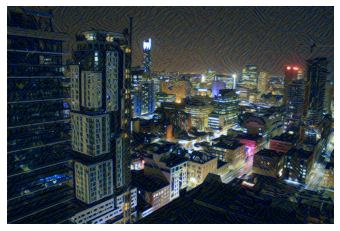

Total Loss :  950203.125
Iteration :  600



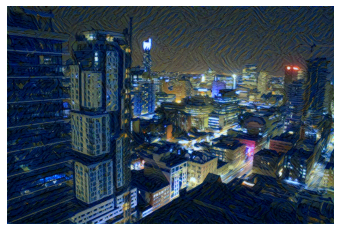

Total Loss :  658740.8125
Iteration :  900



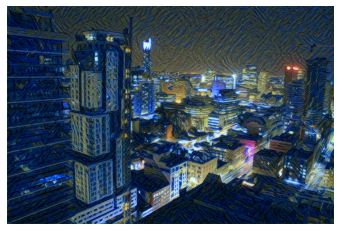

Total Loss :  510701.5625
Iteration :  1200



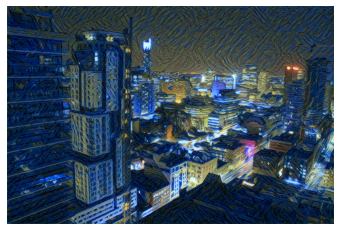

Total Loss :  400961.875
Iteration :  1500



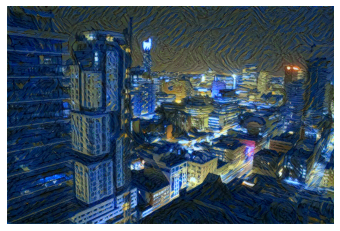

Total Loss :  315081.5
Iteration :  1800



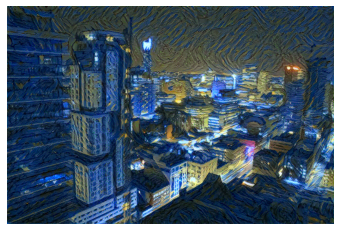

Total Loss :  247026.296875
Iteration :  2100



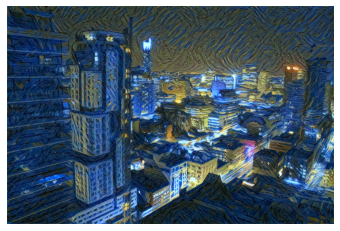

In [108]:
for ii in range(1, steps + 1):

    target_features = get_features(target,vgg)
    content_loss = torch.mean((target_features["conv4_2"] - content_features["conv4_2"]) ** 2)
    #print(content_loss)
    style_loss = 0

    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        style_gram = style_grams[layer]

        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
        #print(layer_style_loss)
    
        _, d, h, w = target_feature.shape
        style_loss +=layer_style_loss / (d*h*w)
    

    total_loss = content_weight * content_loss + style_weight * style_loss 

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if ii % show_every == 0:

        print("Total Loss : ", total_loss.item())
        print("Iteration : ", ii)
        print()
        plt.imshow(img_convert(target))
        plt.axis("off")
        plt.show()

    if ii % capture_frame == 0:

        image_array[counter] = img_convert(target)
        counter = counter + 1

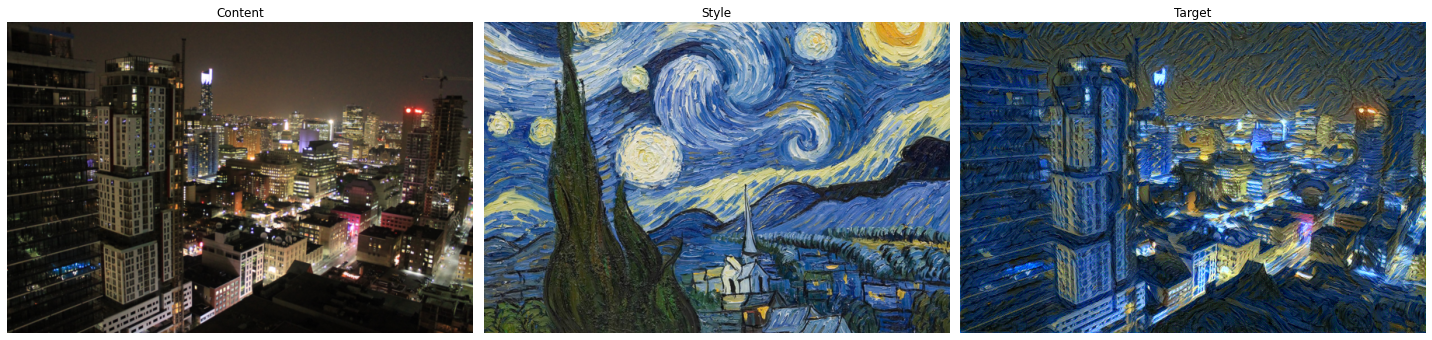

In [109]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.imshow(img_convert(content))
ax1.set_title("Content")
ax1.axis("off")

ax2.imshow(img_convert(style))
ax2.set_title("Style")
ax2.axis("off")

ax3.imshow(img_convert(target))
ax3.set_title("Target")
ax3.axis("off")

plt.tight_layout()
plt.show()

In [113]:
import cv2

frame_height , frame_width , _ = img_convert(target).shape
fps = 30
vid = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"XVID"),fps,(frame_width, frame_height))

for i in range(0,300):
    img = image_array[i]
    img = img * 255
    img = np.array(img, dtype = np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    vid.write(img)

vid.release()

In [114]:
from google.colab import files

files.download("output.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>